In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as sps
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.3)

In [24]:
val_data = pd.read_csv('val_dataset.csv')
text, emotions = val_data['Text'], val_data['Emotion']
predictions = pd.read_csv('shuffled_predictions.csv')
accuracy = pd.DataFrame((predictions.values == emotions.values.reshape(-1, 1)) * 1, columns=predictions.columns)
accuracy.head()

,not shuffled,shuffled
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0


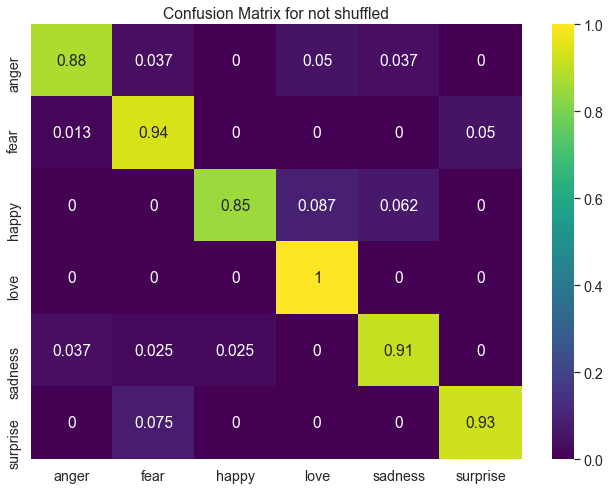

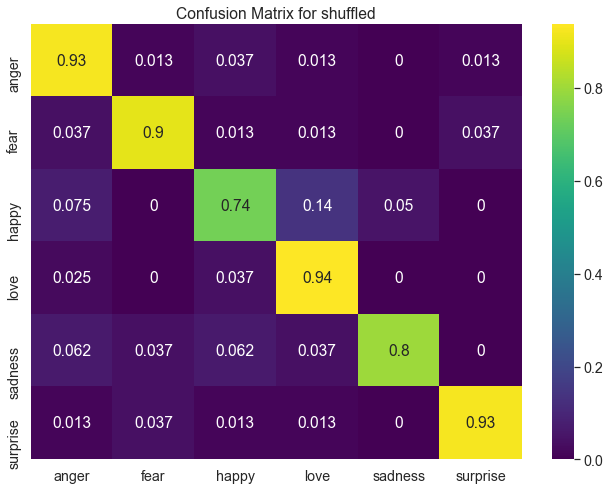

In [11]:
columns = list(predictions.columns)
columns[-1], columns[1] = columns[1], columns[-1]

for column in columns:
    cf_matrix = confusion_matrix(emotions, predictions[column], normalize='true', labels=np.unique(emotions))
    cf_matrix = pd.DataFrame(cf_matrix, columns=np.unique(emotions), index=np.unique(emotions))

    plt.figure(figsize=(11, 8))
    plt.title('Confusion Matrix for {}'.format(column))
    sns.heatmap(cf_matrix, cmap='viridis', annot=True);

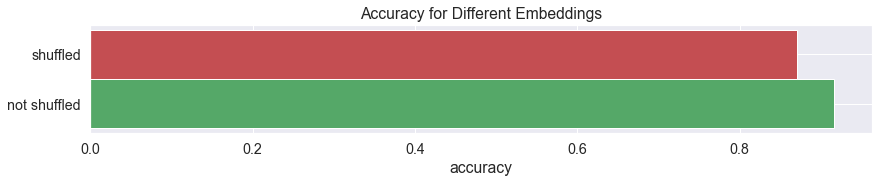

In [13]:
plt.figure(figsize=(14, 2))
plt.title('Accuracy for Different Embeddings')
plt.barh(accuracy.columns, accuracy.mean(), 1, color=['g', 'r'])
plt.xlabel('accuracy')
plt.show()

In [16]:
for name, acc in zip(accuracy.columns, accuracy.mean()):
    print('{} accuracy: {}'.format(name, np.round(acc, 3)))

not shuffled accuracy: 0.917
shuffled accuracy: 0.871


# Statistical Hypothesis Testing (Z-criterion)

$X_1$ &mdash; accuracy for not shuffled data, $X_2$ &mdash; accuracy for shuffled data
  
$H_0\colon \overline{X_1} = \overline{X_2}$  
  
$H_1\colon \overline{X_1} > \overline{X_2}$

In [22]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - sps.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return sps.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - sps.norm.cdf(z_stat)


def proportions_diff_z_stat_rel(sample1, sample2):
    sample = list(zip(sample1, sample2))
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [26]:
print("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_rel(accuracy.iloc[:, 0], accuracy.iloc[:, 1]), 'greater'))

p-value: 0.001255
